In [30]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas as pd
import pandas, xgboost, numpy, textblob, string
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix

In [109]:
df_test = pd.read_csv('../Data/sample_data.csv')
print(len(df_test))

700000


In [110]:
df_test.content = df_test.content.str.lower()
df_test.content = df_test.content.str.replace('\n',' ')
df_test.content = df_test.content.str.replace('\r',' ')

In [114]:
df_test.groupby(['year','month']).count()

Unnamed: 0  Unnamed: 0.1  state  county  newspaper   date  \
year month                                                              
2012 5           37217         37217  37217   37217      37217  37217   
     6           62783         62783  62783   62783      62783  62783   
2013 1           88982         88982  88982   88982      88982  88982   
     2           11018         11018  11018   11018      11018  11018   
2014 1           83830         83830  83830   83830      83830  83830   
     2           11139         11139  11139   11139      11139  11139   
     5            5031          5031   5031    5031       5031   5031   
2015 1           80640         80640  80640   80640      80640  80640   
     6           10091         10091  10091   10091      10091  10091   
     7            4911          4911   4911    4911       4911   4911   
     8            4358          4358   4358    4358       4358   4358   
2016 1           75614         75614  75614   75614      75614  75614   
     2           24386         24386  24386   24386      24386  24386   
2017 5           15870         15870  15870   15870      15870  15870   
     6           55121         55121  55121   55121      55121  55121   
     7           29009         29009  29009   29009      29009  29009   
2018 5            8203          8203   8203    8203       8203   8203   
     6           26678         26678  26678   26678      26678  26678   
     7           37683         37683  37683   37683      37683  37683   
     8           27436         27436  27436   27436      27436  27436   

            content  category  
year month                     
2012 5        37139     37217  
     6        62733     62783  
2013 1        88927     88982  
     2        11004     11018  
2014 1        83788     83830  
     2        11136     11139  
     5         5029      5031  
2015 1        80561     80640  
     6        10091     10091  
     7         4911      4911  
     8         4358      4358  
2016 1        75598     75614  
     2        24383     24386  
2017 5        15861     15870  
     6        55101     55121  
     7        28994     29009  
2018 5         8203      8203  
     6        26674     26678  
     7        37682     37683  
     8        27430     27436

In [34]:
df_temp = pd.read_csv('../Data/all_combined.csv')
print(len(df_temp))

237046


In [35]:
df_temp.head()

,Unnamed: 0,state,id,link,county,newspaper,date,content,notice_id,category,...,Fictitious Business Names (DBA),Water Resumes,Tax Deeds,Seizures,Forfeited Property,Estate Claims,count_catogory,category_no_duplicate,category_no_duplicate_str,count_catogory_no_duplicate
0,0,Mississippi,626/2272017_23983816,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"notice of auction on friday, march 17, 2017 a...",23983816.0,['Auctions'],...,False,False,False,False,False,False,1,['Auctions'],['Auctions'],1
1,1,Mississippi,626/2272017_23983815,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"public notice on october 28, 2015, the pa sta...",23983815.0,['License Suspension'],...,False,False,False,False,False,False,1,['License Suspension'],['License Suspension'],1
2,6,Louisiana,346/2242017_23980782,http://www.publicnoticeads.com/LA/search/view....,Lincoln,The Ruston Daily Leader,2017/02/24,february 24 legals notice of special elec...,23980782.0,['Elections'],...,False,False,False,False,False,False,1,['Elections'],['Elections'],1
3,17,Louisiana,363/3012017_23987556,http://www.publicnoticeads.com/LA/search/view....,St. Bernard,The St. Bernard Voice,2017/02/24,sheriff's sales bank of america na vs. katedra...,23987556.0,['Auctions'],...,False,False,False,False,False,False,1,['Auctions'],['Auctions'],1
4,20,Louisiana,363/3012017_23987557,http://www.publicnoticeads.com/LA/search/view....,St. Bernard,The St. Bernard Voice,2017/02/24,sheriff's sales gulf coast bank and trust co v...,23987557.0,['Auctions'],...,False,False,False,False,False,False,1,['Auctions'],['Auctions'],1


In [36]:
df_temp = df_temp[['content', 'category_no_duplicate']]
df_temp = df_temp.rename(columns={'category_no_duplicate': 'category'})

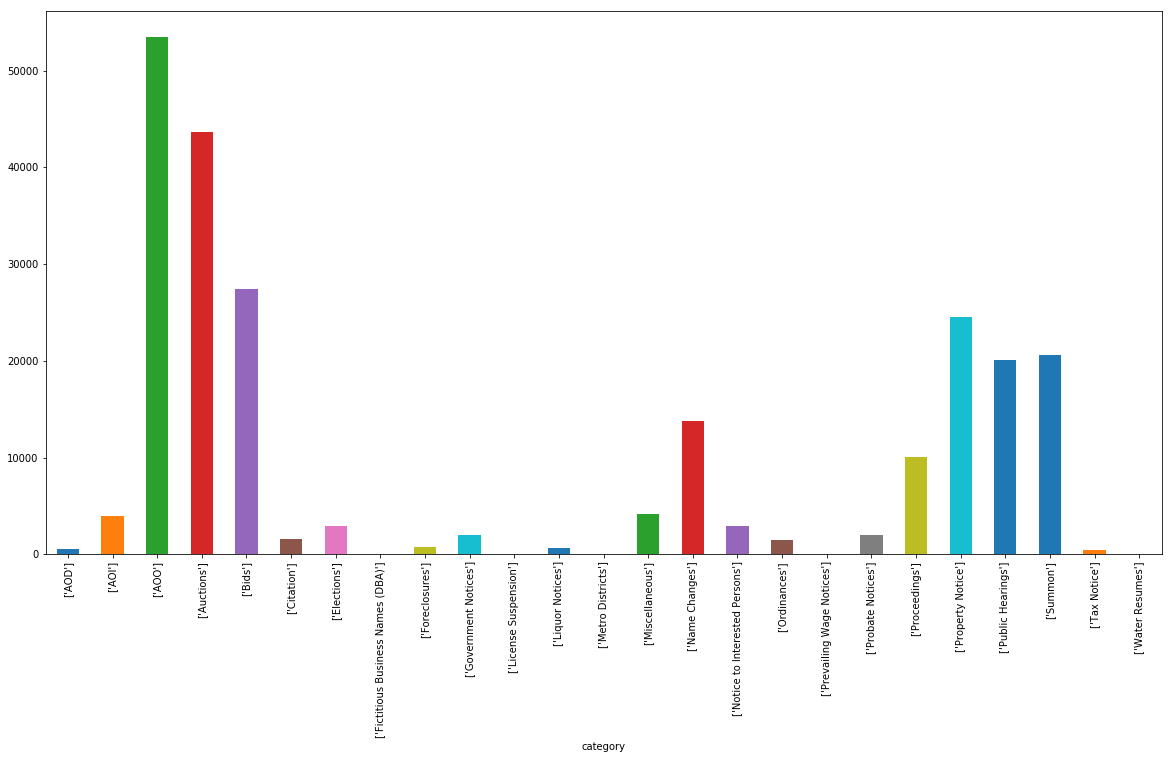

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_temp.groupby('category')['content'].count().plot.bar(ylim=0, figsize=(20,10))
plt.show()

In [38]:
df_temp.category = df_temp.category.str.replace('[','')
df_temp.category = df_temp.category.str.replace(']','')
df_temp.category = df_temp.category.str.replace('\'','')

In [39]:
df_temp.category.unique()

array(['Auctions', 'License Suspension', 'Elections', 'Proceedings',
       'Bids', 'AOO', 'AOI', 'AOD', 'Citation', 'Property Notice',
       'Public Hearings', 'Ordinances', 'Summon', 'Liquor Notices',
       'Miscellaneous', 'Name Changes', 'Notice to Interested Persons',
       'Probate Notices', 'Tax Notice', 'Government Notices',
       'Foreclosures', 'Metro Districts',
       'Fictitious Business Names (DBA)', 'Water Resumes',
       'Prevailing Wage Notices'], dtype=object)

In [40]:
def replace_other(row):
    if row !=TARGET:
        return 'Other'
    else:
        return TARGET

In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns

def train_model(classifier, feature_vector_train, label, feature_vector_valid, true_y):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    conf_mat = confusion_matrix(true_y, predictions)

#     plt.figure(figsize=(9,9))
#     sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',)
#     plt.ylabel('Actual label')
#     plt.xlabel('Predicted label')
    
    scores = precision_recall_fscore_support(true_y, predictions, average='macro')
    return scores, classifier

#     all_sample_title = 'Accuracy Score: {0}'.format(score)
#     plt.title(all_sample_title, size = 15)

    #return metrics.accuracy_score(predictions, true_y)

In [42]:
CATEGORY_LIST  = ['', '', '', '',
           '', '', '', '', '', '',
           '', 'Ordinances', '', '',
           'Miscellaneous', '', '',
           '', '', '',
           '', 'Metro Districts',
           'Fictitious Business Names (DBA)', 'Water Resumes',
           'Prevailing Wage Notices']

In [210]:
#for TARGET in CATEGORY_LIST:
TARGET = 'Foreclosures'
print(TARGET)
temp = []
temp.append(TARGET)
#TARGET = 'Public Hearings'
df = df_temp[df_temp['category']==TARGET]
n = len(df)
print(n)
temp.append(str(n))

df = df.append(df_temp[df_temp['category']!=TARGET].sample(n=n))
df['category_new'] = df.category.apply(replace_other)
#print(df.groupby('category_new')['content'].count())

df_content = df['content']
df_content = df_content.append(df_test.content)
X = df['content']
Y = df['category_new']

Foreclosures
784


In [211]:
print(len(df_content))
print(len(df_test.content))

701568
700000


In [212]:
# word level tf-idf
# tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
# tfidf_vect.fit(df_content)
# x_tfidf =  tfidf_vect.transform(X)

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=100000)
count_vect.fit(df['content'])
x_tfidf =  count_vect.transform(X)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(Y)

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x_tfidf, y, shuffle=True)

In [213]:
print(train_x.shape)
print(valid_x.shape)

(1176, 19409)
(392, 19409)


In [214]:
train_x = coo_matrix(train_x).tocsc()
valid_x = coo_matrix(valid_x).tocsc()

# Extereme Gradient Boosting on Count Vectors
accuracy, model = train_model(xgboost.XGBClassifier(), train_x.tocsc(), train_y, valid_x.tocsc(), valid_y)
print(accuracy)

(0.9975369458128078, 0.9973684210526316, 0.9974461708850451, None)


C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [215]:
new_x = df_test['content'].astype('U').values
new_tfidf =  count_vect.transform(new_x)
new_tfidf = coo_matrix(new_tfidf).tocsc()
print(new_tfidf.shape)

(700000, 19409)


In [216]:
preds = model.predict(new_tfidf.tocsc())    
print(list(encoder.inverse_transform([0,1])))

['Foreclosures', 'Other']


C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [122]:
# df_test['category'] = 'Other'

In [217]:
for i,p in enumerate(preds):
    if i%10000==0:
        print(i)
    if p==0:
        df_test['category'].iloc[i] = 'Government Notices'

0


C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000


In [219]:
df_test.to_csv('classified_v1.csv')

In [218]:
df_test.groupby('category').count()

,Unnamed: 0,Unnamed: 0.1,state,county,newspaper,date,content,year,month
category,,,,,,,,,
AOD,1188,1188,1188,1188,1188,1188,1188,1188,1188
AOI,5377,5377,5377,5377,5377,5377,5377,5377,5377
AOO,42244,42244,42244,42244,42244,42244,42244,42244,42244
Auctions,170851,170851,170851,170851,170851,170851,170851,170851,170851
Bids,49023,49023,49023,49023,49023,49023,49023,49023,49023
Elections,8166,8166,8166,8166,8166,8166,8166,8166,8166
Government Notices,127175,127175,127175,127175,127175,127175,127175,127175,127175
Other,242707,242707,242707,242707,242707,242707,242310,242707,242707
Summon,49429,49429,49429,49429,49429,49429,49429,49429,49429
